**Analyzing Dog Adoption Success Rates and Preferred Breeds**

In [2]:
import pandas as pd
import numpy as np

#Load datasets
dog_descriptions = pd.read_csv("C:\\Users\\astri\\OneDrive\\Desktop\\archive\\allDogDescriptions.csv")
dog_travel = pd.read_csv("C:\\Users\\astri\\OneDrive\\Desktop\\archive\\dogTravel.csv")

In [3]:
dog_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            58180 non-null  int64  
 1   id               58180 non-null  int64  
 2   org_id           58180 non-null  object 
 3   url              58180 non-null  object 
 4   type.x           58180 non-null  object 
 5   species          58180 non-null  object 
 6   breed_primary    58180 non-null  object 
 7   breed_secondary  20821 non-null  object 
 8   breed_mixed      58180 non-null  bool   
 9   breed_unknown    58180 non-null  bool   
 10  color_primary    26134 non-null  object 
 11  color_secondary  12059 non-null  object 
 12  color_tertiary   1217 non-null   object 
 13  age              58180 non-null  object 
 14  sex              58180 non-null  object 
 15  size             58180 non-null  object 
 16  coat             27185 non-null  object 
 17  fixed       

In [4]:
dog_travel.info()
dog_travel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          6194 non-null   int64 
 1   id             6194 non-null   int64 
 2   contact_city   6194 non-null   object
 3   contact_state  6194 non-null   object
 4   description    6194 non-null   object
 5   found          6194 non-null   object
 6   manual         2147 non-null   object
 7   remove         1738 non-null   object
 8   still_there    319 non-null    object
dtypes: int64(2), object(7)
memory usage: 435.6+ KB


,index,id,contact_city,contact_state,description,found,manual,remove,still_there
0,0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN


In [5]:
merged_data = pd.merge(dog_descriptions, dog_travel, left_on='id', right_on='id')

# Print the information about the merged DataFrame
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 6193
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_x          6194 non-null   int64  
 1   id               6194 non-null   int64  
 2   org_id           6194 non-null   object 
 3   url              6194 non-null   object 
 4   type.x           6194 non-null   object 
 5   species          6194 non-null   object 
 6   breed_primary    6194 non-null   object 
 7   breed_secondary  2296 non-null   object 
 8   breed_mixed      6194 non-null   bool   
 9   breed_unknown    6194 non-null   bool   
 10  color_primary    2869 non-null   object 
 11  color_secondary  1240 non-null   object 
 12  color_tertiary   133 non-null    object 
 13  age              6194 non-null   object 
 14  sex              6194 non-null   object 
 15  size             6194 non-null   object 
 16  coat             3137 non-null   object 
 17  fixed         

In [6]:
merged_data.head()

,index_x,id,org_id,url,type.x,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,...,type.y,description_x,index_y,contact_city_y,contact_state_y,description_y,found,manual,remove,still_there
0,186,45923603,NV173,https://www.petfinder.com/dog/blair-45923603/n...,Dog,Dog,German Shepherd Dog,NaN,True,False,...,Dog,Meet Blair. Blair was confiscated from a hoard...,389,Las Vegas,NV,Meet Blair. Blair was confiscated from a hoard...,Arizona,NaN,NaN,NaN
1,187,45923600,NV173,https://www.petfinder.com/dog/duane-45923600/n...,Dog,Dog,German Shepherd Dog,NaN,True,False,...,Dog,Handsome Duane was confiscated from part of a ...,390,Las Vegas,NV,Handsome Duane was confiscated from part of a ...,Arizona,NaN,NaN,NaN
2,428,45289127,NV162,https://www.petfinder.com/dog/mustard-45289127...,Dog,Dog,Beagle,NaN,False,False,...,Dog,Mustard was part of a pair. He came in with Br...,2100,Las Vegas,NV,Mustard was part of a pair. He came in with Br...,Las Vegas,Texas,NaN,NaN
3,428,45289127,NV162,https://www.petfinder.com/dog/mustard-45289127...,Dog,Dog,Beagle,NaN,False,False,...,Dog,Mustard was part of a pair. He came in with Br...,4704,Las Vegas,NV,Mustard was part of a pair. He came in with Br...,Texas,NaN,NaN,NaN
4,494,44801851,NV205,https://www.petfinder.com/dog/max-44801851/nv/...,Dog,Dog,Boxer,NaN,True,False,...,Dog,Our Max.... This boy has been through a lot an...,3798,Las Vegas,NV,Our Max.... This boy has been through a lot an...,Puerto Rico,NaN,NaN,NaN


In [7]:
selected_columns = ['id', 'species', 'breed_primary', 'breed_secondary', 'breed_mixed', 
                    'color_primary', 'color_secondary', 'age', 'sex', 'size', 'coat', 
                    'fixed', 'house_trained', 'special_needs', 'shots_current', 
                    'env_children', 'env_dogs', 'env_cats', 'name', 'status', 
                    'contact_state_x', 'found', 'remove', 'still_there']

# Select the desired columns
selected_data = merged_data[selected_columns].copy()

# Print the updated DataFrame
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6194 entries, 0 to 6193
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               6194 non-null   int64 
 1   species          6194 non-null   object
 2   breed_primary    6194 non-null   object
 3   breed_secondary  2296 non-null   object
 4   breed_mixed      6194 non-null   bool  
 5   color_primary    2869 non-null   object
 6   color_secondary  1240 non-null   object
 7   age              6194 non-null   object
 8   sex              6194 non-null   object
 9   size             6194 non-null   object
 10  coat             3137 non-null   object
 11  fixed            6194 non-null   bool  
 12  house_trained    6194 non-null   bool  
 13  special_needs    6194 non-null   bool  
 14  shots_current    6194 non-null   bool  
 15  env_children     3093 non-null   object
 16  env_dogs         4433 non-null   object
 17  env_cats         1820 non-null   

In [8]:
selected_data.head()

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,color_secondary,age,sex,size,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,NaN
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,NaN
2,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,NaN
3,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Texas,NaN,NaN
4,44801851,Dog,Boxer,NaN,True,Bicolor,NaN,Young,Male,Large,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,NaN


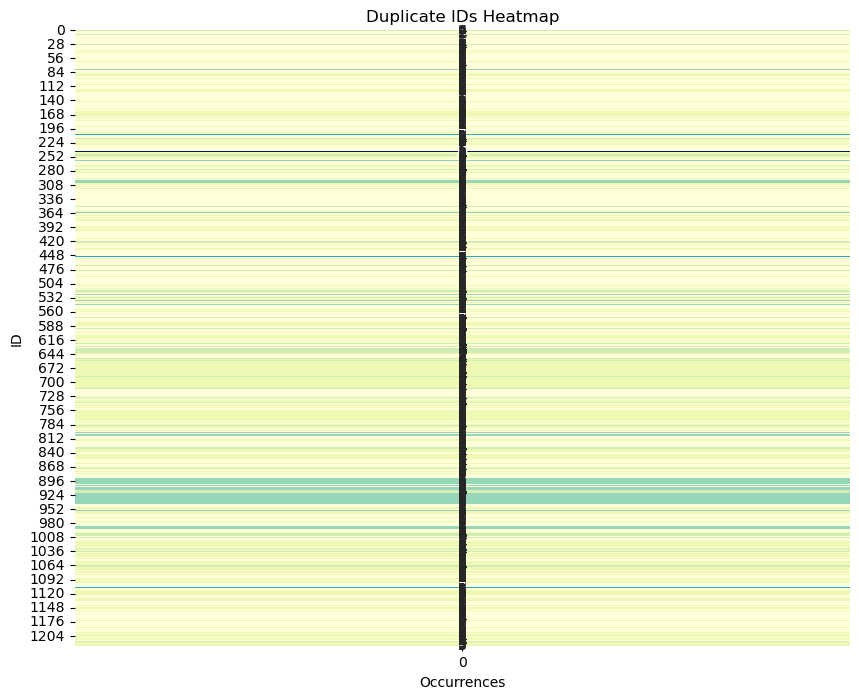

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicate IDs
duplicate_ids = selected_data[selected_data.duplicated('id', keep=False)]

# Create a pivot table to count occurrences of duplicate IDs
duplicate_counts = duplicate_ids.pivot_table(index='id', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(duplicate_counts.values.reshape(-1, 1), cmap='YlGnBu', cbar=False, annot=True, fmt='d')
plt.title('Duplicate IDs Heatmap')
plt.xlabel('Occurrences')
plt.ylabel('ID')
plt.show()

In [10]:
# Remove duplicates based on 'id' column
clean_data = selected_data.drop_duplicates(subset='id')

# Check for duplicate IDs in the cleaned DataFrame
duplicate_ids_clean = clean_data[clean_data.duplicated('id', keep=False)]

# Create a pivot table to count occurrences of duplicate IDs
duplicate_counts_clean = duplicate_ids_clean.pivot_table(index='id', aggfunc='size', fill_value=0)

# Check if there are any duplicate IDs
if not duplicate_counts_clean.empty:
    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(duplicate_counts_clean.values.reshape(-1, 1), cmap='YlGnBu', cbar=False, annot=True, fmt='d')
    plt.title('Duplicate IDs Heatmap in Cleaned Data')
    plt.xlabel('Occurrences')
    plt.ylabel('ID')
    plt.show()
else:
    print("No duplicate IDs found in the cleaned data.")

No duplicate IDs found in the cleaned data.


In [11]:
clean_data.head()

,id,species,breed_primary,breed_secondary,breed_mixed,color_primary,color_secondary,age,sex,size,...,shots_current,env_children,env_dogs,env_cats,name,status,contact_state_x,found,remove,still_there
0,45923603,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Blair,adoptable,NV,Arizona,NaN,NaN
1,45923600,Dog,German Shepherd Dog,NaN,True,NaN,NaN,Baby,Male,Medium,...,False,NaN,NaN,NaN,Duane,adoptable,NV,Arizona,NaN,NaN
2,45289127,Dog,Beagle,NaN,False,NaN,NaN,Adult,Male,Medium,...,False,NaN,True,NaN,Mustard,adoptable,NV,Las Vegas,NaN,NaN
4,44801851,Dog,Boxer,NaN,True,Bicolor,NaN,Young,Male,Large,...,True,True,True,NaN,Max,adoptable,NV,Puerto Rico,NaN,NaN
5,44731850,Dog,Maltese,Poodle,True,White / Cream,NaN,Young,Female,Small,...,True,True,True,NaN,Forever,adoptable,NV,Las Vegas,NaN,NaN


In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 6193
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4115 non-null   int64 
 1   species          4115 non-null   object
 2   breed_primary    4115 non-null   object
 3   breed_secondary  1541 non-null   object
 4   breed_mixed      4115 non-null   bool  
 5   color_primary    1921 non-null   object
 6   color_secondary  887 non-null    object
 7   age              4115 non-null   object
 8   sex              4115 non-null   object
 9   size             4115 non-null   object
 10  coat             2147 non-null   object
 11  fixed            4115 non-null   bool  
 12  house_trained    4115 non-null   bool  
 13  special_needs    4115 non-null   bool  
 14  shots_current    4115 non-null   bool  
 15  env_children     2198 non-null   object
 16  env_dogs         2981 non-null   object
 17  env_cats         1275 non-null   

In [13]:
# Drop the 'color_secondary' column
clean_data = clean_data.drop(columns=['color_secondary'])

# Print the updated DataFrame info
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 6193
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               4115 non-null   int64 
 1   species          4115 non-null   object
 2   breed_primary    4115 non-null   object
 3   breed_secondary  1541 non-null   object
 4   breed_mixed      4115 non-null   bool  
 5   color_primary    1921 non-null   object
 6   age              4115 non-null   object
 7   sex              4115 non-null   object
 8   size             4115 non-null   object
 9   coat             2147 non-null   object
 10  fixed            4115 non-null   bool  
 11  house_trained    4115 non-null   bool  
 12  special_needs    4115 non-null   bool  
 13  shots_current    4115 non-null   bool  
 14  env_children     2198 non-null   object
 15  env_dogs         2981 non-null   object
 16  env_cats         1275 non-null   object
 17  name             4115 non-null   

In [16]:
# Calculate unique value counts
unique_counts = clean_data.nunique()

print(unique_counts)

id                 4115
species               1
breed_primary       153
breed_secondary     116
breed_mixed           2
color_primary        15
age                   4
sex                   2
size                  4
coat                  6
fixed                 2
house_trained         2
special_needs         2
shots_current         2
env_children          2
env_dogs              2
env_cats              2
name               3013
status                4
contact_state_x      46
found               518
remove                1
still_there           1
dtype: int64


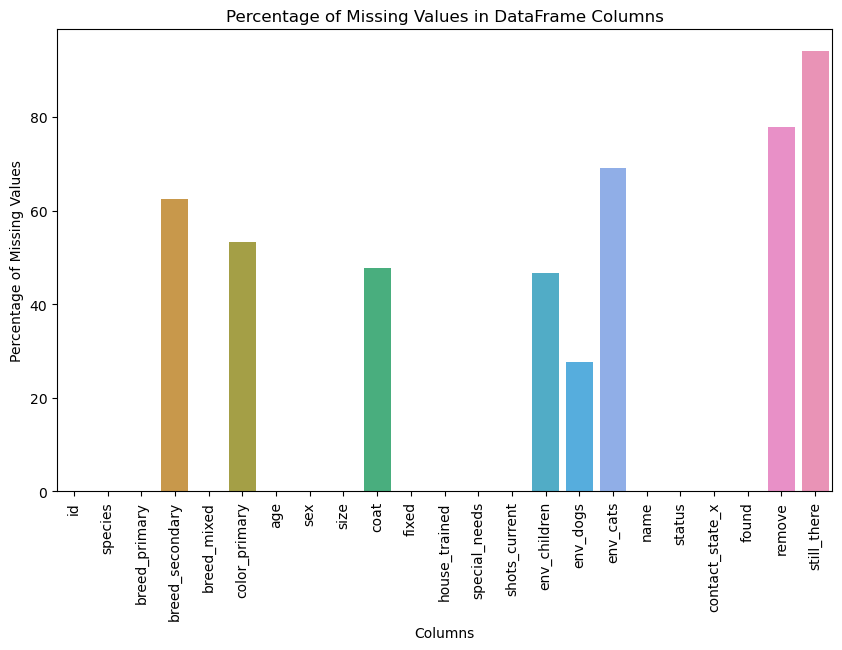

In [17]:
import seaborn as sns

# Calculate missing value percentages
missing_percent = (clean_data.isnull().sum() / len(clean_data)) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.title('Percentage of Missing Values in DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

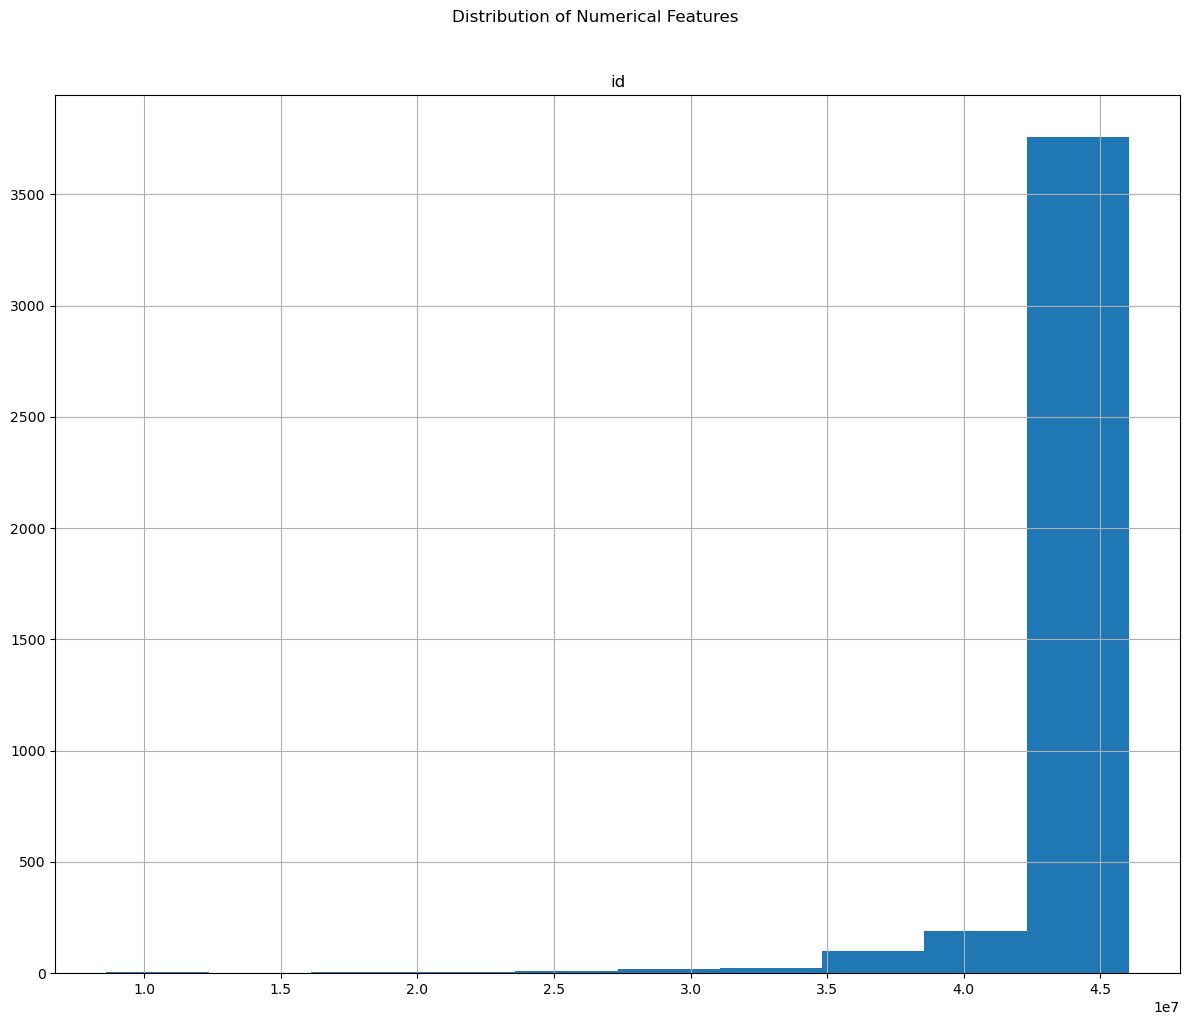

          age    size   sex color_primary
count    4115    4115  4115          1921
unique      4       4     2            15
top     Adult  Medium  Male         Black
freq     1642    2230  2116           593


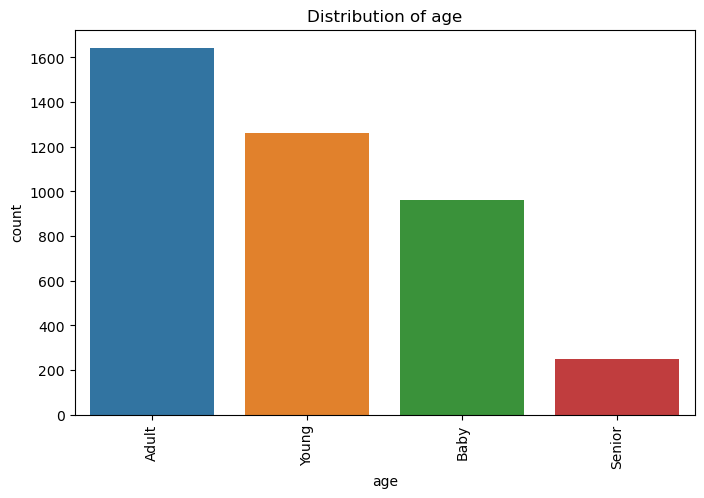

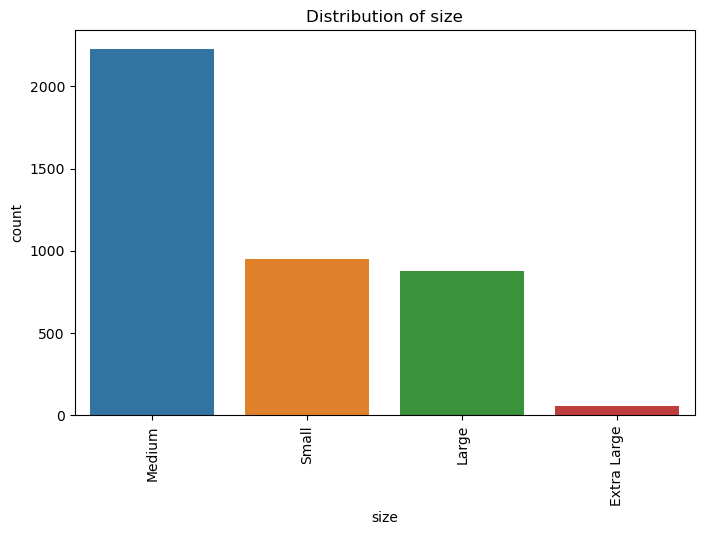

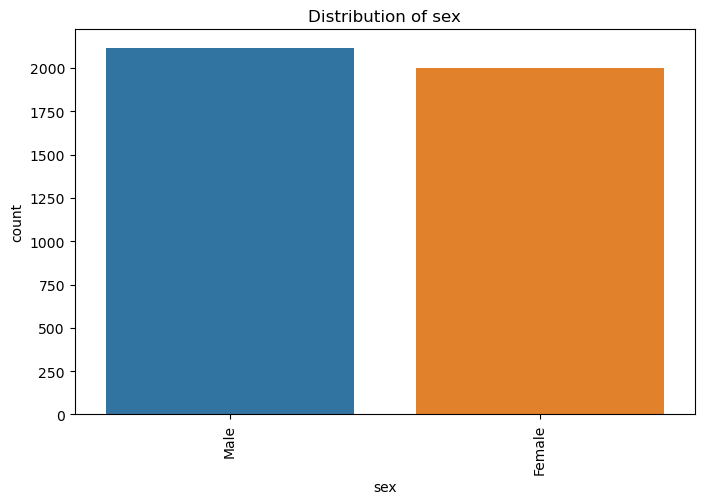

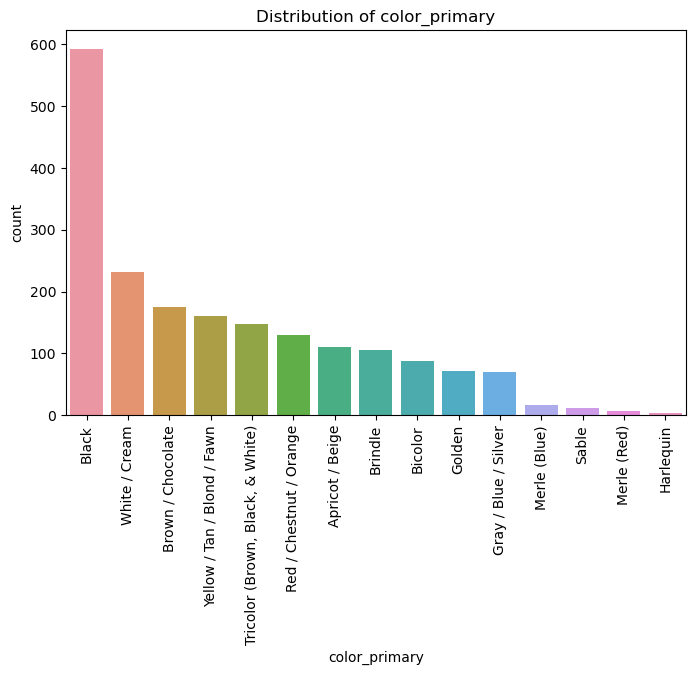

In [29]:
# Select a subset of features for investigation
selected_features = clean_data[['age', 'size', 'sex', 'color_primary']]

# Display summary statistics
feature_stats = selected_features.describe(include=object)
print(feature_stats)

# Plotting feature patterns
for column in selected_features.columns:
    if selected_features[column].dtype == object:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=selected_features, x=column, order=selected_features[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()

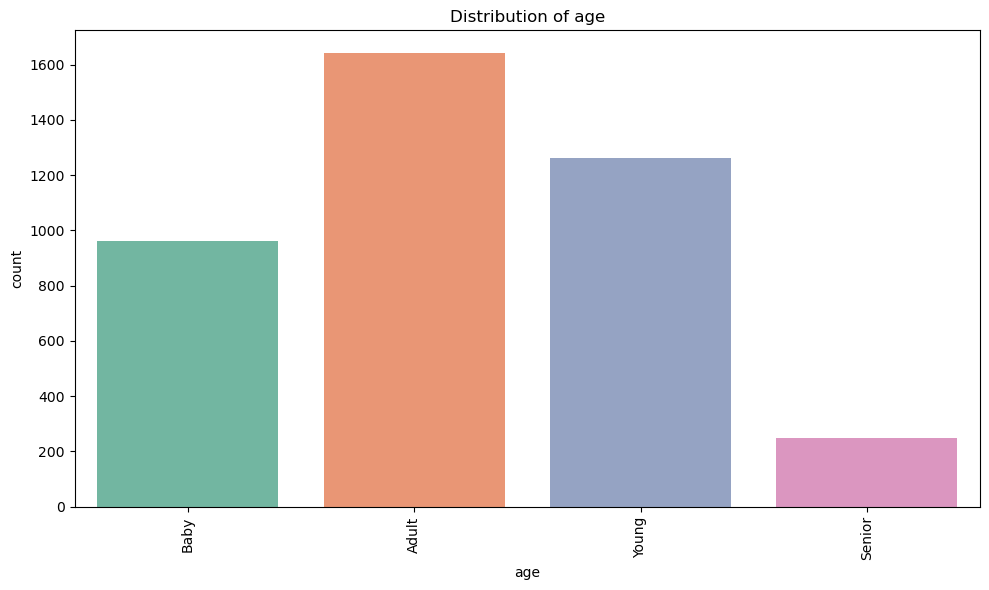

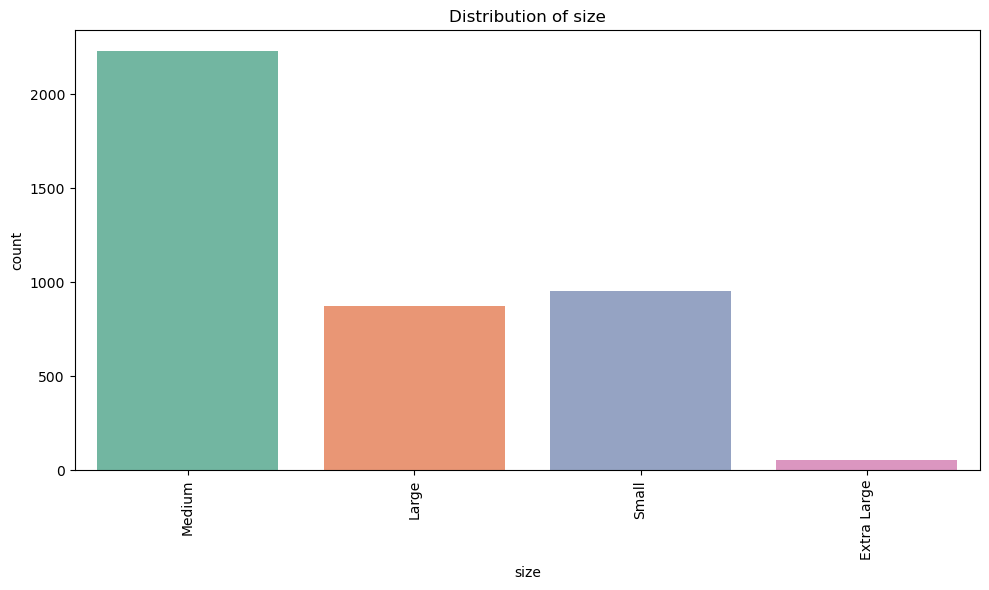

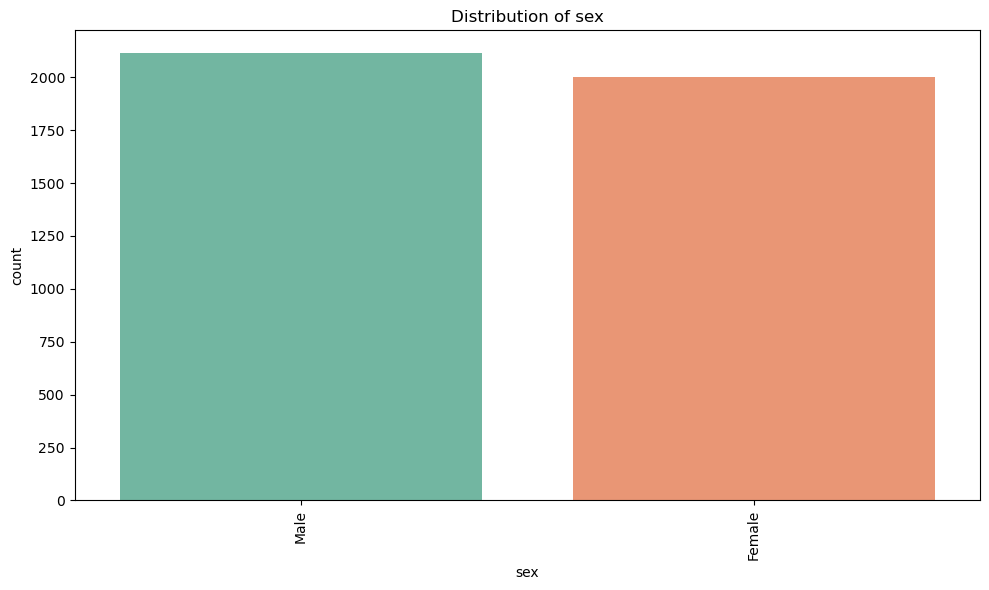

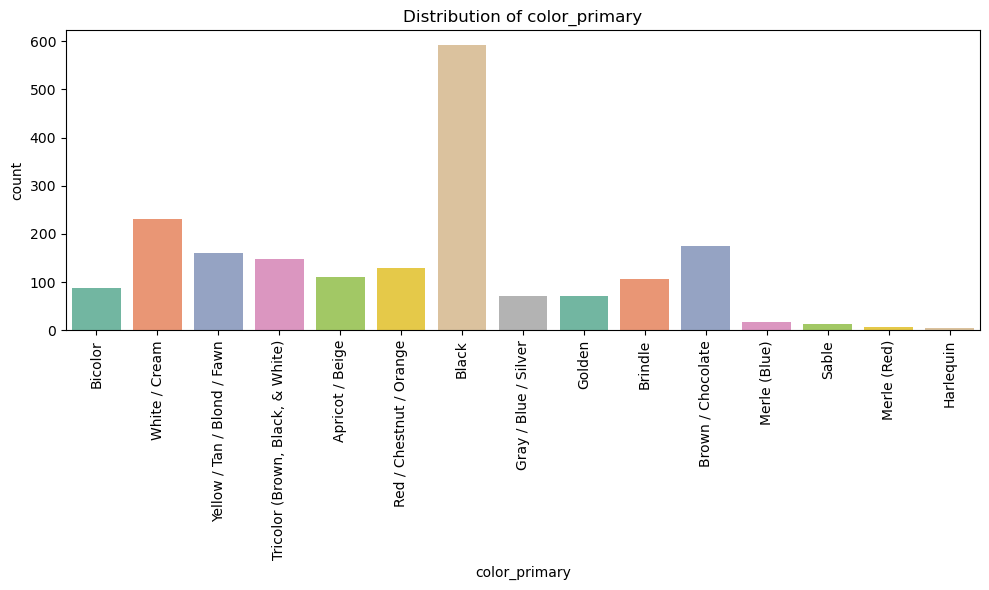

In [24]:
# Select the columns for investigation
selected_features = clean_data[['age', 'size', 'sex', 'color_primary']]

# Plotting Discrete and Ordinal Features
for column in selected_features.columns:
    if selected_features[column].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=selected_features, x=column, palette='Set2')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.tight_layout()  
        plt.show()

**EDA tasks for the project**

1.Data Loading: loaded the datasets "allDogDescriptions.csv" and "dogTravel.csv" into DataFrames named dog_descriptions and dog_travel.

2.Data Merging: merged the two DataFrames based on the 'id' column using pd.merge() and created a new DataFrame named merged_data.

3.Data Selection: selected a subset of columns from the merged data using the selected_columns list.

4.Data Cleaning: checked for duplicate IDs using a heatmap and removed duplicate rows based on the 'id' column using the drop_duplicates() function, resulting in the clean_data DataFrame. 
Dropped the 'color_secondary' column from the clean_data DataFrame.

5.Missing Value Analysis: calculated the percentage of missing values for each column and visualized it using a bar plot.

6.Feature Patterns Analysis: selected a subset of features for investigation (selected_features) and created count plots to visualize the distribution of categorical variables.

7.Discrete and Ordinal Feature Analysis: created count plots to visualize the distribution of discrete and ordinal features ('age', 'size', 'sex', 'color_primary').